### Deep Learning Ch08 
`deep_convnet.py` model

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# # 処理に時間のかかる場合はデータを削減 
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

In [2]:
print(x_train.shape)
print(t_train.shape)

(60000, 1, 28, 28)
(60000,)


In [3]:
print(x_test.shape) 
print(t_test.shape)

(10000, 1, 28, 28)
(10000,)


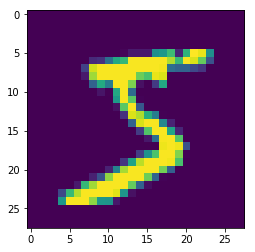

In [4]:
plt.imshow(x_train[0].reshape(28,28))

In [5]:
from deep_convnet import DeepConvNet

In [6]:
deepconv = DeepConvNet()

In [7]:
# Load pre-trained parameters to the model
deepconv.load_params('deep_convnet_params.pkl')

In [8]:
import torch
# See first 100 data outputs
predicts = torch.Tensor(deepconv.predict(x_test[:100]))

In [9]:
# predict outputs
outputs = torch.argmax(predicts, 1)

In [10]:
outputs

tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9,  0,  6,  9,  0,
         1,  5,  9,  7,  3,  4,  9,  6,  6,  5,  4,  0,  7,  4,
         0,  1,  3,  1,  3,  4,  7,  2,  7,  1,  2,  1,  1,  7,
         4,  2,  3,  5,  1,  2,  4,  4,  6,  3,  5,  5,  6,  0,
         4,  1,  9,  5,  7,  8,  9,  3,  7,  4,  6,  4,  3,  0,
         7,  0,  2,  9,  1,  7,  3,  2,  9,  7,  7,  6,  2,  7,
         8,  4,  7,  3,  6,  1,  3,  6,  9,  3,  1,  4,  1,  7,
         6,  9])

In [11]:
# labels
torch.LongTensor(t_test[:100])

tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9,  0,  6,  9,  0,
         1,  5,  9,  7,  3,  4,  9,  6,  6,  5,  4,  0,  7,  4,
         0,  1,  3,  1,  3,  4,  7,  2,  7,  1,  2,  1,  1,  7,
         4,  2,  3,  5,  1,  2,  4,  4,  6,  3,  5,  5,  6,  0,
         4,  1,  9,  5,  7,  8,  9,  3,  7,  4,  6,  4,  3,  0,
         7,  0,  2,  9,  1,  7,  3,  2,  9,  7,  7,  6,  2,  7,
         8,  4,  7,  3,  6,  1,  3,  6,  9,  3,  1,  4,  1,  7,
         6,  9])

In [12]:
# First 100 data
accuracy = 100 * ((outputs == torch.LongTensor(t_test[:100])).sum() / len(outputs))
print('accuracy:', int(accuracy), "%")

accuracy: 100 %


In [15]:
# DeepConvNetのメソッドのaccuracyを使って、正解率を求める

# test dataset
deepconv.accuracy(x = x_test, t = t_test)

0.99350000000000005

Accuracy 99.35%

In [16]:
# train dataset
deepconv.accuracy(x = x_train, t = t_train)

0.99833333333333329

In [13]:
print('Parameter dimesions:')
for i in range(1,9):
    print('W' + str(i), deepconv.params['W' + str(i)].shape)
    print('b' + str(i), deepconv.params['b' + str(i)].shape)

Parameter dimesions:
W1 (16, 1, 3, 3)
b1 (16,)
W2 (16, 16, 3, 3)
b2 (16,)
W3 (32, 16, 3, 3)
b3 (32,)
W4 (32, 32, 3, 3)
b4 (32,)
W5 (64, 32, 3, 3)
b5 (64,)
W6 (64, 64, 3, 3)
b6 (64,)
W7 (1024, 50)
b7 (50,)
W8 (50, 10)
b8 (10,)


### PyTorch

In [14]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

In [15]:
# Hyper parameters
num_epochs = 20
hidden_size = 50
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [16]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../dataset/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../dataset/',
                                          train=False, 
                                          transform=transforms.ToTensor())

In [17]:
#plt.imshow(train_dataset.train_data[0].reshape(28,28))

In [18]:
print(train_dataset.train_data.size())
print(test_dataset.test_data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [19]:
# # # 処理に時間のかかる場合はデータを削減
# small_num_train_dataset = 10000
# small_num_test_dataset = 5000

# train_dataset = [train_dataset[i] for i in range(small_num_train_dataset)]
# test_dataset = [test_dataset[i] for i in range(small_num_test_dataset)]

In [20]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [21]:
# after Dataloader (normalized 0-255=>0-1)
for images, labels in train_loader:
    print('images:', images.shape, '\nlabels:', labels.shape)
    print(images[0][0][6])
    break

images: torch.Size([100, 1, 28, 28]) 
labels: torch.Size([100])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.1059,  0.8667,  0.9922,  0.9451,
         0.8667,  0.9882,  0.9922,  0.9059,  0.6275,  0.0627,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])


### Padding & Stride

- Valid padding (zero padding)
    - input size (4x4) > output size (2x2) (stride=1, kernel=3x3)

- Same padding (non-zero padding)
    - input size (5x5) = output size (5x5) (stride=1, kernel=3x3)

- Output size

    $ O = \frac {W-K+2P}{S} + 1 $
    - O: output h/w
    - W: input h/w
    - K: filter size(kernel size)
    - P: padding
        - $  P = \frac {K-1}{2} $
    - S: stride

### Todo list:
- deeper nn:
    ```
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        affine - relu - dropout - affine - dropout - softmax
    ```
- try `kaiming_normal` parameters
- try `dropout` after fully-connected layers


### Model 2:


```
Network
Input ->
Conv -> ReLU -> Conv -> ReLU ->MaxPool -> 
Conv -> ReLU -> Conv -> ReLU ->MaxPool -> 
Conv -> ReLU -> Conv -> ReLU ->MaxPool -> 
Affine - ReLU - Dropout - Affine - Dropout - Softmax -> Labels
```

```
Convolutional layer formula:
- Filter(Kernel) size K = 3 => (3 x 3)
- P(same padding) P = (3-1)/2=1
- S(stride) S = 1
- in_channels = 1 (gray image)
- out_channels (int) – Number of channels produced by the convolution = 16
Pooling layer formula:
- K = 2 => (2 x 2)
```

```
Dimensions:
-> Input(28, 28) 
-> Conv (16, 28, 28) 
-> Conv (16, 28, 28) 
-> MaxPool (16, 14, 14)
-> Conv (32, 14, 14)
-> Conv (32, 16, 16) 
-> MaxPool (32, 8, 8)
-> Conv (32, 8, 8)
-> Conv (32, 8, 8) 
-> MaxPool (32, 4, 4)
-> Fully Connected Layer(Logits (10, 1) -> Softmax) -> Labels
```

In [22]:
class PytorchDeepConvNet2(nn.Module):
    def __init__(self, num_classes=10):
        super(PytorchDeepConvNet2, self).__init__()

        # Layer 1: conv - relu - conv- relu - pool
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
            # Add BatchNorm2d() layer
#             nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))        
        
        # Layer 2: conv - relu - conv- relu - pool
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            # Add BatchNorm2d() layer
#             nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Layer 3: conv - relu - conv- relu - pool
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            # Add BatchNorm2d() layer
#             nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Fully Connected 1 (readout)
        # Affine - ReLU - Dropout - Affine - Dropout - Softmax
        self.layer4 = nn.Sequential(
            nn.Linear(64 * 4 * 4, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, num_classes),
            nn.Dropout(0.5))

        # Initialize all parameters using kaiming normalization
        self.init_weights_kaiming()
    
    def init_weights_kaiming(self):
        #Use kaiming normalization to initialize the parameters
        for layer in [self.layer1, self.layer2, self.layer3, self.layer4]:
            for m in layer:
                if type(m) == nn.Conv2d or type(m) == nn.Linear:
                    m.weight = nn.init.kaiming_normal_(m.weight)

    def forward(self, x):

        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = out.view(out.size(0), -1)
    
        # Linear function (readout)
        out = self.layer4(out)
        
        return out
    
#     def predict(self, x):

#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = self.layer3(out)
        
#         out = out.view(out.size(0), -1)
    
#         # For prediction, do not use dropout layer
#         for m in self.layer4:
#             if type(m) != nn.Dropout:
#                 out = m(out)
#         return out        


In [23]:
model = PytorchDeepConvNet2(num_classes)
print(model)
criterion = nn.CrossEntropyLoss()
# Use Adam as the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

PytorchDeepConvNet2(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=1024, out_features=50, bias=True)
    (1): ReL

In [ ]:
iter = 0
# accuracies = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images) # Now we dont need to resize like images.view(xx)
        labels = Variable(labels)
        
        # Clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: Softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t paramters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:

            
            # Print Loss
            print('Iteration: {}. Loss: {}.'.format(iter, loss.item()))

Iteration: 500. Loss: 1.2536752223968506.
Iteration: 1000. Loss: 1.0378079414367676.
Iteration: 1500. Loss: 1.001308560371399.
Iteration: 2000. Loss: 0.9463627338409424.
Iteration: 2500. Loss: 0.9311299324035645.
Iteration: 3000. Loss: 0.9065763354301453.
Iteration: 3500. Loss: 0.7186115384101868.
Iteration: 4000. Loss: 0.744046688079834.
Iteration: 4500. Loss: 0.8450638055801392.
Iteration: 5000. Loss: 0.9300395250320435.
Iteration: 5500. Loss: 0.7464480400085449.
Iteration: 6000. Loss: 1.0350948572158813.
Iteration: 6500. Loss: 0.9463658332824707.
Iteration: 7000. Loss: 0.848503589630127.
Iteration: 7500. Loss: 0.9512791633605957.
Iteration: 8000. Loss: 0.9735271334648132.
Iteration: 8500. Loss: 0.8381157517433167.
Iteration: 9000. Loss: 0.8571024537086487.
Iteration: 9500. Loss: 0.8564756512641907.
Iteration: 10000. Loss: 0.8399238586425781.


In [27]:
wrong_predictions = []

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images)
        labels = Variable(labels)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # See which are error predictions
        fail = (predicted == labels)
        err_imgs = images[fail == 0]
        err_labels = labels[fail == 0]
        err_outputs = predicted[fail == 0]
        for img, lbl, out in zip(err_imgs, err_labels, err_outputs):
            wrong_predictions.append((img, lbl, out))
     
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 99.17 %


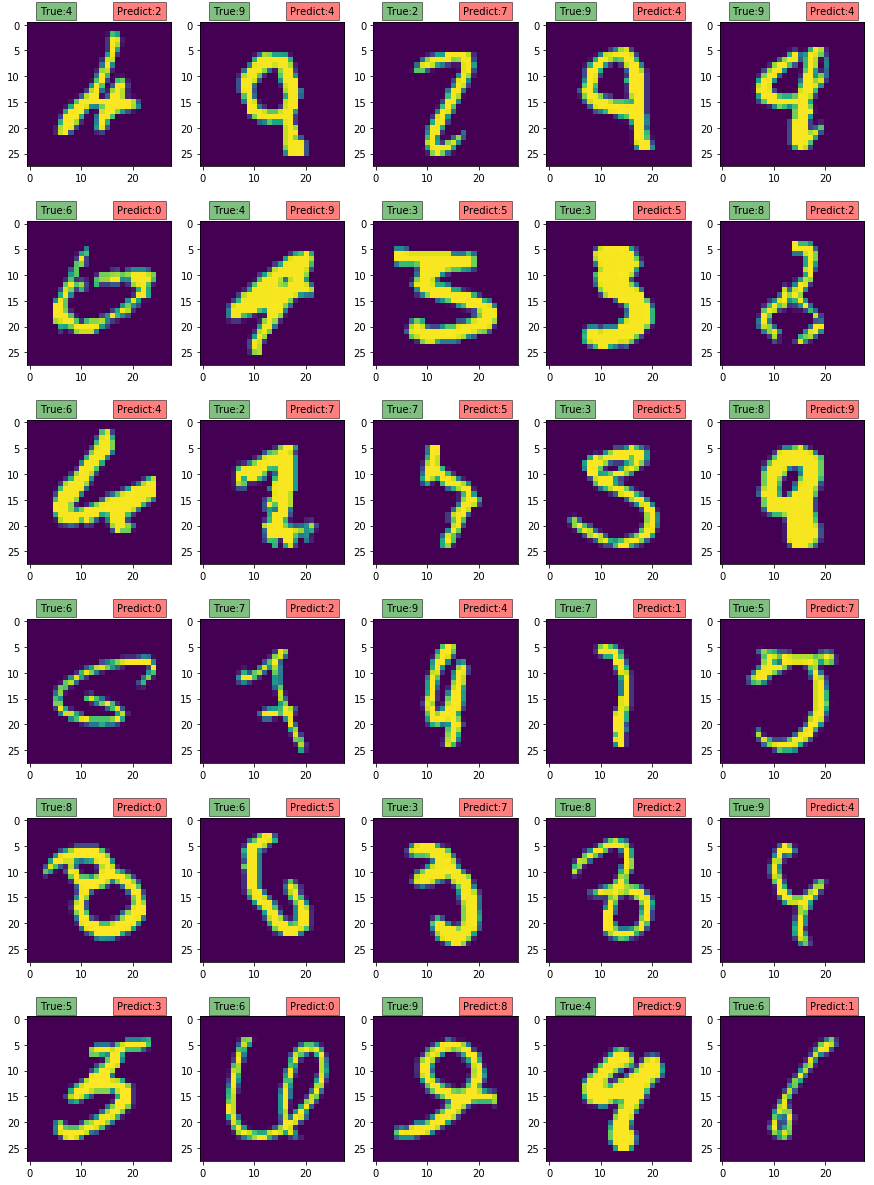

In [28]:
# Show wrong predictions
plt.figure(figsize=(15,25))
columns = 5
for i, err in enumerate(wrong_predictions[:30]):
    plt.subplot(len(wrong_predictions[:30]) / columns + 1, columns, i + 1)
    img, lbl, out = err
    plt.imshow(img.reshape(28,28))
    plt.text(2,-2,'True:'+str(lbl.item()), bbox=dict(facecolor='green', alpha=0.5))
    plt.text(17,-2,'Predict:'+str(out.item()), bbox=dict(facecolor='red', alpha=0.5))

### Test memo:

#### Model 1
|dataset size(train/test)|#epoch|      model  |  optimizer | parameters |lr| accuracy  |
|-----------------------|-------|--------------|------------|------------|--|------------|
|60000/10000|5|(conv - relu - conv- relu - pool)x2, linearx1 |torch.optim.SGD|-|0.01| 97.03%|
|60000/10000|5|(conv - relu - conv- relu - pool)x2, linearx1 |torch.optim.Adam|-|0.01| 97.69%|
|60000/10000|5|(conv - relu - conv- relu - pool)x2, linearx1 |torch.optim.Adam|Kaiming He|0.01| 98.48%|
|60000/10000|5|(conv - relu - conv- relu - pool)x2, linearx1 |torch.optim.Adam|Kaiming He|0.001| 99.11%|

#### Model 2
|dataset size(train/test)|#epoch|      model  |  optimizer | parameters |lr| accuracy  |
|-----------------------|-------|--------------|------------|------------|--|------------|
|60000/10000|5|(conv - relu - conv- relu - pool)x3, linear-relu-dropout-linear-dropout |torch.optim.Adam|Kaiming He|0.01| 96.83%|
|60000/10000|10|(conv - relu - conv- relu - pool)x3, linear-relu-dropout-linear-dropout |torch.optim.Adam|Kaiming He|0.001| 99.15%|
|60000/10000|20|(conv - relu - conv- relu - pool)x3, linear-relu-dropout-linear-dropout |torch.optim.Adam|Kaiming He|0.001| 99.17%|

In [36]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [24]:
# Load pretrained model
model.load_state_dict(torch.load('model.ckpt'))